In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [71]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam_emails.csv")


In [72]:
print("----- Dataset Head -----")
display(df.head())

----- Dataset Head -----


,num_links,num_attachments,sender_reputation,is_spam
0,1,2,0.188025,no
1,4,1,0.355385,no
2,3,4,0.783792,no
3,2,4,0.554227,no
4,6,1,0.005230,no


In [73]:
print("----- Dataset Shape -----")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

----- Dataset Shape -----
Rows: 100, Columns: 4


In [74]:
print("----- Dataset Info -----")
df.info()

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_links          100 non-null    int64  
 1   num_attachments    100 non-null    int64  
 2   sender_reputation  100 non-null    float64
 3   is_spam            100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [75]:
print("----- Duplicate Rows -----")
dup = df.duplicated().sum()
print(f"Number of duplicated rows: {dup}")

----- Duplicate Rows -----
Number of duplicated rows: 0


In [76]:

# Preprocessing
df['is_spam'] = df['is_spam'].map({'yes': 1, 'no': 0})  # Encode target
X = df.drop('is_spam', axis=1)                          # Features
y = df['is_spam']                                       # Target

In [77]:

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

In [78]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [79]:
#Train model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

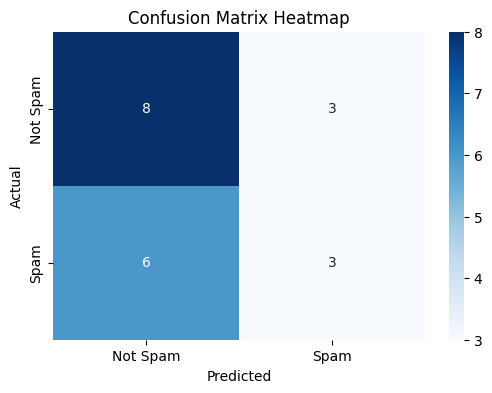

In [80]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [81]:

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")

Accuracy : 0.55
Precision: 0.50
Recall   : 0.33
